In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import json
import math
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [3]:
# generic store data to file function
def store_data(data, file, mode='w', toJson=False):
    if toJson:
        data = json.dumps(data)
    with open(file, mode, encoding='utf-8') as fp:
        result = fp.write(data)
        return result
    
# generic load data from file function
def load_data(file, fromJson=False):
    if os.path.isfile(file):
        with open(file, 'r', encoding='utf-8', errors="ignore") as fp:
            data = fp.read()
            if fromJson:
                data = json.loads(data)
            return data
    else:
        return 'file not found'

# test text
#print(store_data('Hello', '../data/repositories/mlart/test.txt'))
#print(load_data('../data/repositories/mlart/test.txt'))

# test json
#print(store_data({'msg':'Hello World'}, '../data/repositories/mlart/test.json', toJson=True))
#print(load_data('../data/repositories/mlart/test.json', fromJson=True))

#store_data(result[0]['html'], '../data/repositories/kaggle/notebook.html')
#store_data(result[0]['iframe'], '../data/repositories/kaggle/kernel.html')

In [4]:
# read in all json files

folder = '../data/database/json/'
subfolder = os.listdir(folder)
#print(subfolder)

df = pd.DataFrame()

quit = 0
i = 0
for item in subfolder:
    fp = os.path.join(folder, item)
    if os.path.isdir(fp):
        print('###')
        print('files:', item)
        files = os.listdir(fp)
        print(len(files))
        for file in files:
            data = load_data(os.path.join(folder, item, file), fromJson=True)
            #print(data)
            df = df.append(data, ignore_index=True)
            
            i += 1
            
            if i%100 == 0:
                print(i)
            
            if quit!= 0 and i >= quit:
                break
    if quit!= 0 and i >= quit:
                break
            
print(df.shape)
print(df.head())

###
files: bc
541
100
200
300
400
500
###
files: bcg
16
###
files: gh
433
600
700
800
900
###
files: ka_c
217
1000
1100
1200
###
files: ka_cn
2082
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
###
files: ma
389
3300
3400
3500
3600
###
files: me
14
###
files: tcp
172
3700
3800
###
files: za
58
3900
(3922, 52)
                           category  category_score compete_score  \
0        Construction & Engineering             0.0           0.0   
1                Wholesale & Retail             0.0           0.0   
2              Education & Research             0.0           0.0   
3              Education & Research             0.0           0.0   
4  Biotechnological & Life Sciences             0.0           0.0   

          date_project         date_scraped  \
0  2017-10-05 21:41:57  2020-12-20 09:48:53   
1  2020-11-08 07:38:20  2020-12-19 23:07:15   
2  2017-07-27 14:27:10  2020-12-19 23:14:04   
3  2020-12-10 07:48:31  2020-12-2

In [5]:
# get shape
df.shape

(3922, 52)

In [6]:
# store for later use
path = '../data/database/.temp/all.csv'
df.to_csv(path, sep=';', index=False)

In [7]:
# read from file
path = '../data/database/.temp/all.csv'
#df = pd.read_csv(path, sep=';')

In [8]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   category                         3922 non-null   object 
 1   category_score                   3922 non-null   float64
 2   compete_score                    3922 non-null   object 
 3   date_project                     3868 non-null   object 
 4   date_scraped                     3643 non-null   object 
 5   description                      3922 non-null   object 
 6   description_category             2507 non-null   object 
 7   description_category_runtime     2507 non-null   float64
 8   description_category_score       2507 non-null   float64
 9   description_subcategory          2507 non-null   object 
 10  description_subcategory_runtime  2507 non-null   float64
 11  description_subcategory_score    2507 non-null   float64
 12  engagement_score    

In [9]:
# aggregate some values for form guidance on GUI
form_guide = {}
def add_guide(key, df_col, drop=[], show=False, sort=False):
    global form_guide
    # drop nan and convert to list
    val = df_col.dropna().values.tolist()
    # make unique
    val = list(set(val))
    # drop items
    for item in drop:
        if item in val:
            val.remove(item)
    # sort list
    if sort == True:
        val.sort()
    # store items
    form_guide[key] = val
    
    if show == True:
        print(form_guide[key])

In [10]:
# diagram function
def chart_feature(feature, df=df, x=10, y=10, label=None, legend=1, columns=1, stacked=True,
                  save=False, printValues=False, sort_index=False,
                  truncate_start=0, truncate=0,
                  kill=[], rename={}, colormap='Spectral'):
    
    if sort_index == True:
        n = df[feature].value_counts().sort_index()
    else:
        n = df[feature].value_counts()
    
    if truncate != 0:
        n = n[0:truncate]
    if truncate_start != 0:
        n = n[truncate_start:]
    if label == None:
        label = feature
        
    for item in kill:
        if item in n:
            n.pop(item)
    
    for key in rename.keys():
        n[rename[key]] = n.pop(key)
    
    df2=pd.DataFrame([n], index=[''])
    #df2.columns = ['key', 'value']
    #df2.sort_values(by='value', ascending=True)
    
    #print(list(df2.columns.values))
    
    if printValues:
        print(df2)
    
    # https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
    # http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps
    
    ax = df2.plot(kind='bar', stacked=stacked, figsize=(x,y), title=label, colormap=colormap)
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines[:], labels[::legend], loc='best', ncol=columns)
    fig = ax.get_figure()
    if save == True:
        fig.savefig(feature + '.png')

['Accommodation & Food', 'Accounting', 'Agriculture', 'Banking & Insurance', 'Biotechnological & Life Sciences', 'Construction & Engineering', 'Economics', 'Education & Research', 'Emergency & Relief', 'Finance', 'Government and Public Works', 'Healthcare', 'Justice, Law and Regulations', 'Manufacturing', 'Media & Publishing', 'Miscellaneous', 'Physics', 'Real Estate, Rental & Leasing', 'Utilities', 'Wholesale & Retail']


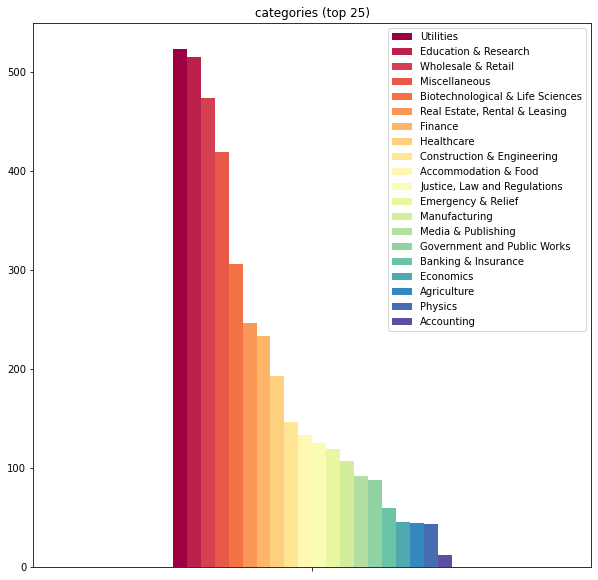

In [11]:
df['category_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['category']]
df['category_list'] = ['None' if x == '' else x for x in df['category_list']]
truncate = 25
chart_feature('category_list', stacked=False, sort_index=False, truncate=truncate, truncate_start=0, label='categories (top '+str(truncate)+')')

add_guide('category', df['category_list'], drop=['None'], sort=True, show=True)

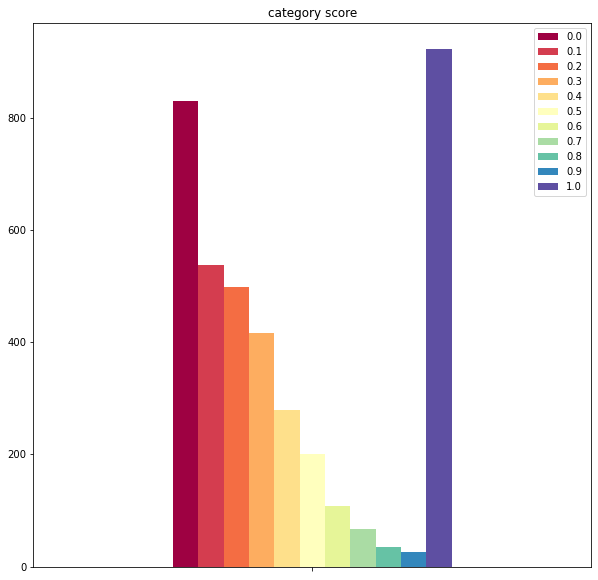

In [12]:
df['category_score_round'] = [round(x,1) for x in df['category_score']]
chart_feature('category_score_round', stacked=False, sort_index=True, label='category score')

['Accomodation', 'Ambulance:', 'Analytics', 'Art', 'Betting', 'Charities', 'Chemoinformatics and drug discovery', 'Coal, Oil & Gas', 'Computational', 'Construction', 'Consumer Financial', 'Crime', 'Data', 'Data, Parsing and APIs', 'Development', 'Disaster Management', 'Economics', 'Election Analysis', 'Electricity', 'Engineering', 'Entertainment', 'Failure', 'Food', 'Fraud', 'General', 'Genomics', 'Insurance and Risk', 'Judicial Applied', 'Life-sciences', 'Machine Learning', 'Maintenance', 'Management and Operations', 'Marketing', 'Material Science', 'Physical', 'Policy and Regulatory', 'Politics', 'Preventative and Reactive', 'Quality', 'Real Estate', 'Rental & Leasing', 'Restaurant', 'Retail', 'School', 'Sequencing', 'Social Policies', 'Student', 'Textual Analysis', 'Tools', 'Tourism', 'Trading & Investment', 'Transportation', 'Valuation', 'Water & Pollution', 'Wholesale']


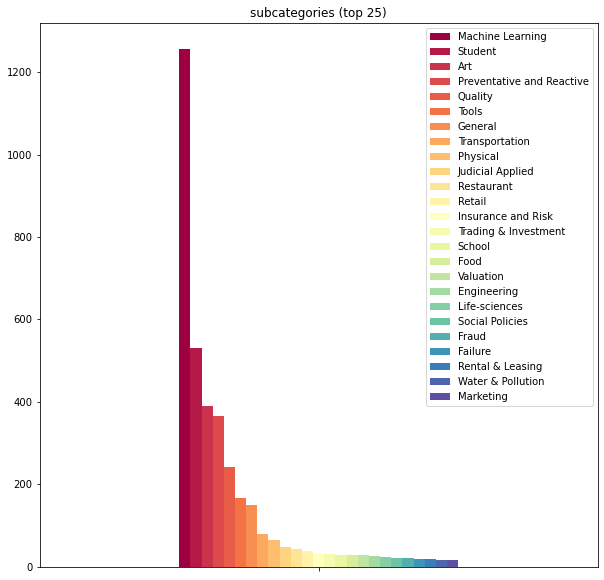

In [13]:
def str_to_list(s):
    if isinstance(s, str):
        s = s.replace("'", "").replace(' ,', ',').replace(
            '[', '').replace(']', '').split(',')
        s = [i.strip() for i in s if i]
        s = ', '.join(s)
    return s

df['subcategory_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['subcategory']]
df['subcategory_list'] = ['None' if x == '' else str_to_list(x) for x in df['subcategory_list']]
truncate = 25
chart_feature('subcategory_list', stacked=False, sort_index=False, truncate=truncate, truncate_start=0, label='subcategories (top '+str(truncate)+')')

add_guide('subcategory', df['subcategory_list'], drop=['None'], sort=True, show=True)

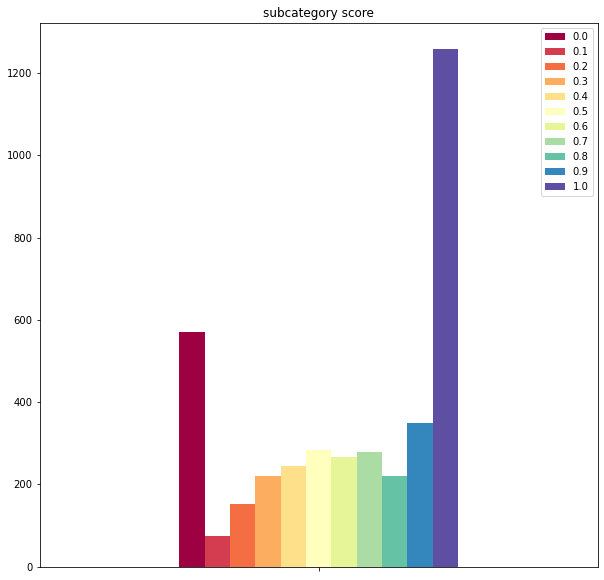

In [14]:
df['subcategory_score_round'] = [round(x,1) for x in df['subcategory_score']]
chart_feature('subcategory_score_round', stacked=False, sort_index=True, label='subcategory score')

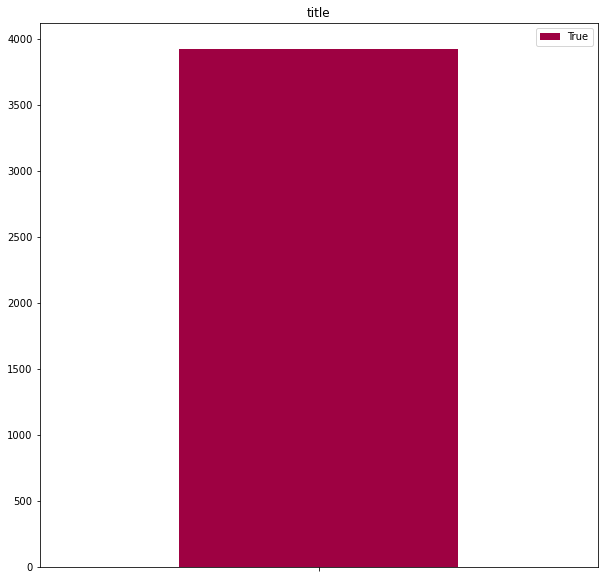

In [15]:
df['title_flat'] = [False if x == '' else True for x in df['title']]
chart_feature('title_flat', stacked=False, label='title') #, colormap='RdYlBu'

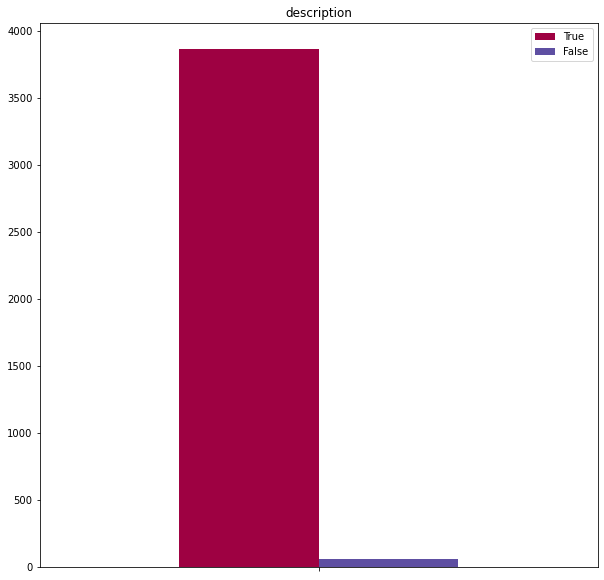

In [16]:
df['description_flat'] = [False if x == '' else True for x in df['description']]
chart_feature('description_flat', stacked=False, label='description')

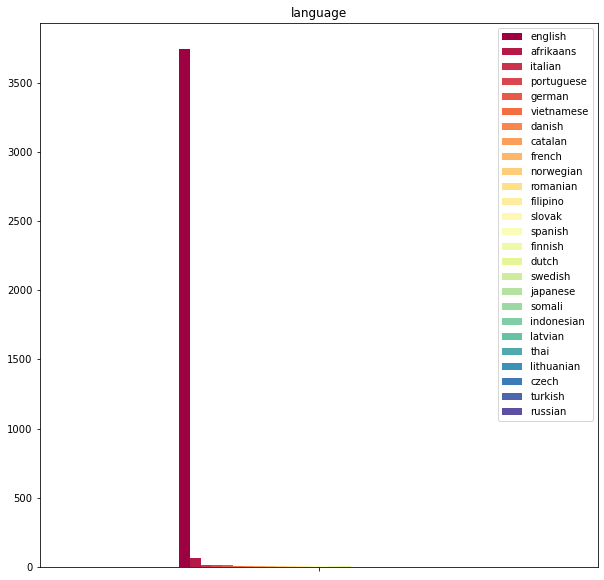

In [17]:
#df['language_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['language']]
#df['language_list'] = ['None' if x == '' else x for x in df['language_list']]
chart_feature('language', stacked=False, label='language')

#add_guide('host', df['host'], drop=['None'], show=True)

['bcgdv.com', 'medium.com', 'mlart.co', 'thecleverprogrammer.com', 'www.github.com', 'www.kaggle.com', 'zalando.com']


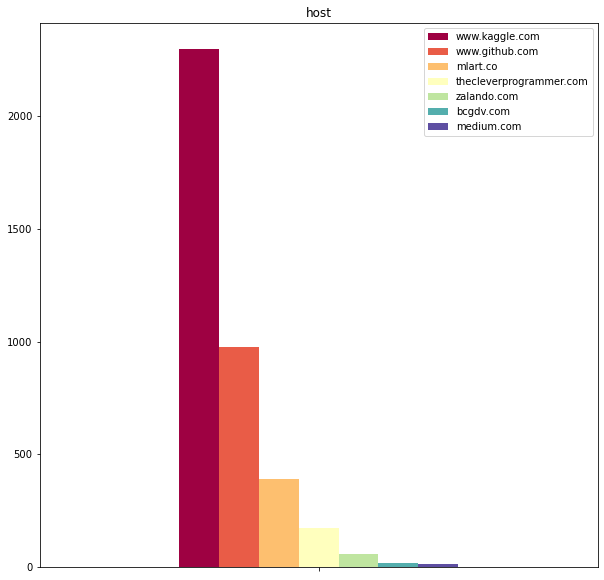

In [18]:
chart_feature('host', stacked=False)

add_guide('host', df['host'], drop=['None'], sort=True, show=True)

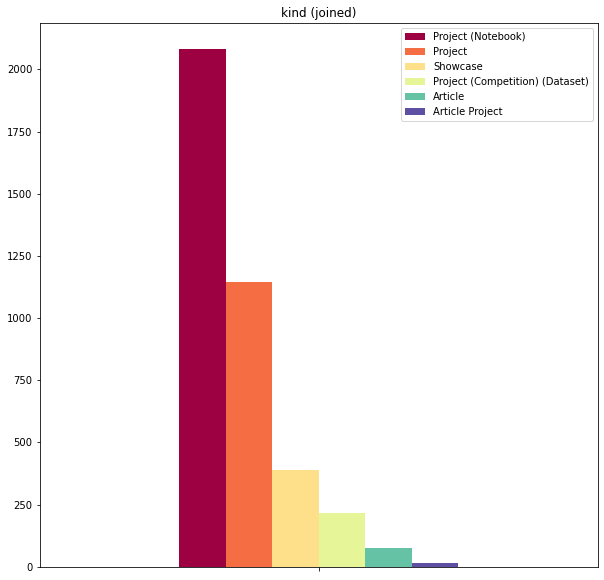

In [19]:
df['kind_list'] = [' '.join(x) if isinstance(x, list) else x for x in df['kind']]
df['kind_list'] = ['None' if x == '' else str_to_list(x) for x in df['kind_list']]
chart_feature('kind_list', stacked=False, label='kind (joined)')

#add_guide('host', df['host'], drop=['None'], show=True)

['(Competition)', '(Dataset)', '(Notebook)', 'Article', 'Project', 'Showcase']


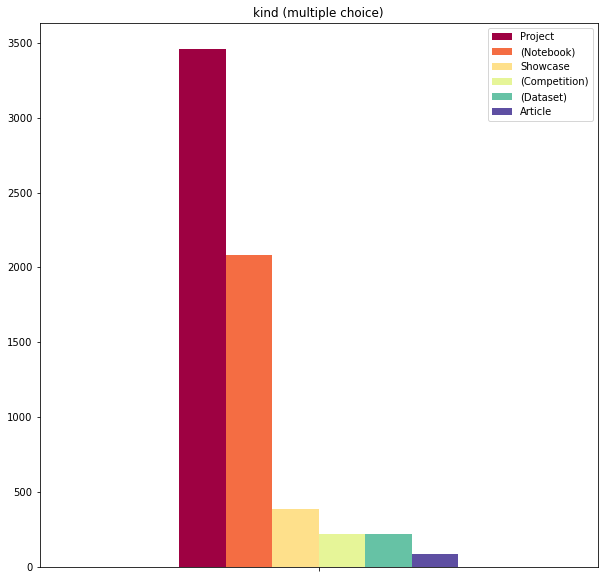

In [20]:
data = []
for item in df['kind']:
    if isinstance(item, list):
        data.extend(item)
    else:
        data.append(item)
    
df2 = pd.DataFrame(data)
rename = {'project': 'Project', 'notebook':'Notebook', 'dataset': '(Dataset)', 'competition': '(Competition)'}
df2[0].replace(rename, inplace=True)

chart_feature(0, stacked=False, sort_index=False, df=df2, truncate=30, label='kind (multiple choice)')

add_guide('kind', df2[0], drop=['None'], sort=True, show=True)

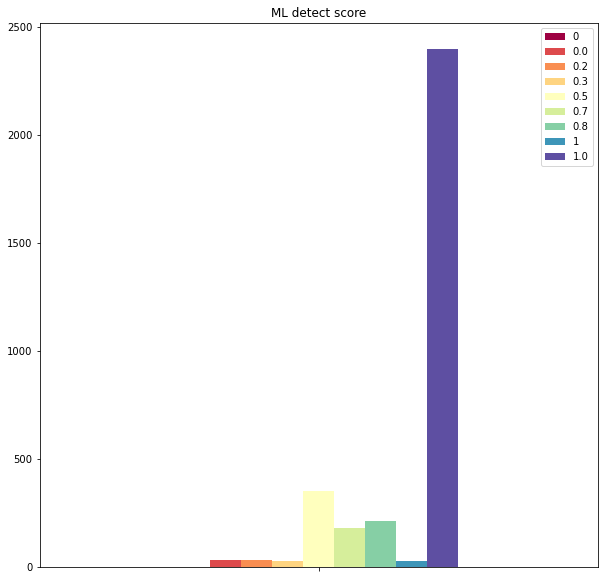

In [21]:
chart_feature('ml_score', stacked=False, sort_index=True, label='ML detect score')

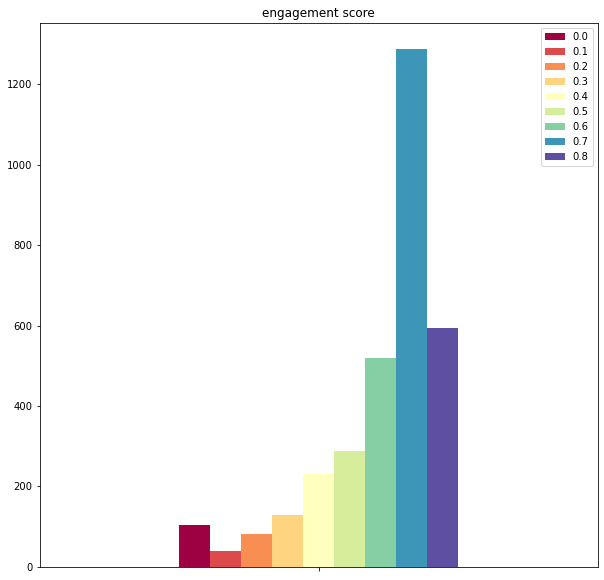

In [22]:
df['engagement_score_round'] = [round(float(x),1) if x != None else 0 for x in df['engagement_score']]
chart_feature('engagement_score_round', stacked=False, sort_index=True, label='engagement score')

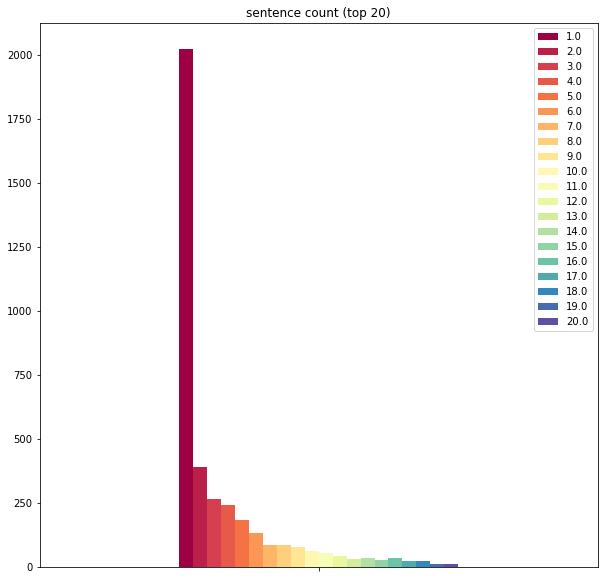

In [23]:
steps = 1
df['sentences_round'] = [round(x/steps,0)*steps for x in df['sentences']]
chart_feature('sentences_round', stacked=False, sort_index=True, label='sentence count (top 20)', truncate=20)

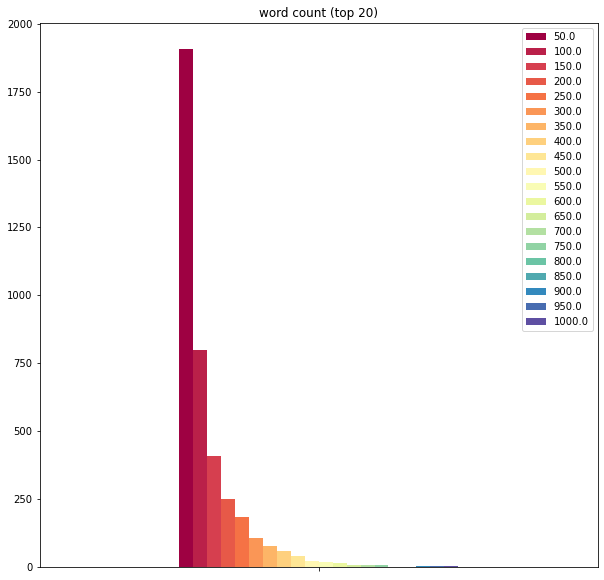

In [24]:
steps = 50
df['words_round'] = [round(x/steps,0)*steps+steps for x in df['words']]
chart_feature('words_round', stacked=False, sort_index=True, truncate=1000, label='word count (top 20)')

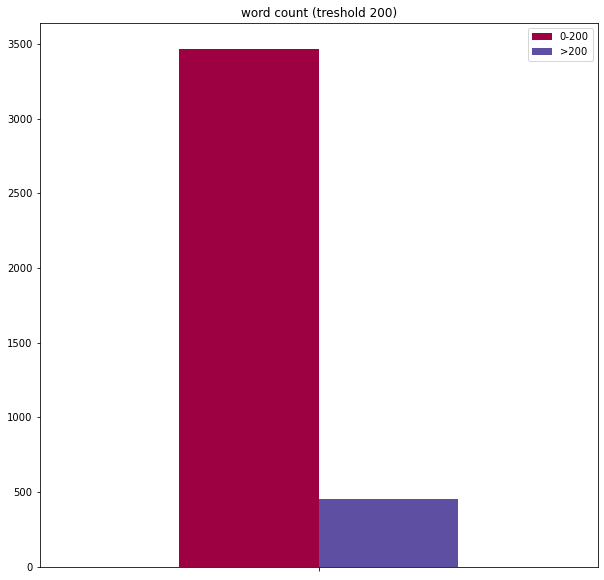

In [25]:
treshold = 200
ts = str(treshold)
df['words_treshold'] = ['0-'+ts if x <= treshold else '>'+ts for x in df['words']]
chart_feature('words_treshold', stacked=False, sort_index=True, truncate=1000, label='word count (treshold '+ts+')')

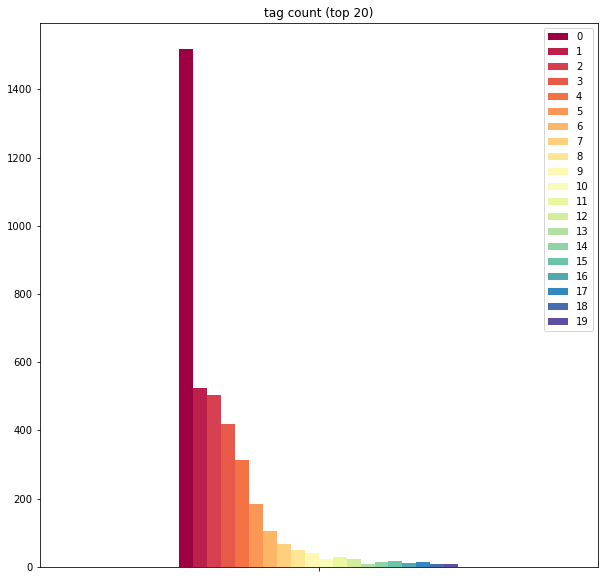

In [26]:
df['tags_count'] = [len(x) for x in df['tags']]
chart_feature('tags_count', stacked=False, sort_index=True, label='tag count (top 20)', truncate=20)

['3D', '3D Photo Inpainting', 'ANN', 'Ableton Live', 'Abstract', 'Abstract Painting', 'Accurate Decision-Making', 'Adversarial Learning', 'AlexNet', 'Animating Landscape', 'Animation', 'Anomaly Detection', 'Anthropomorphism', 'App', 'Architecture', 'Arcitechture', 'Art', 'Art Nouveau', 'Artbreeder', 'Arts and Entertainment', 'Astronomy', 'AttnGAN', 'Audio', 'AutoML', 'Automotive', 'B3D', 'BASNet', 'Background Removal', 'Banking', 'Bayesian', 'Bias', 'BigGAN', 'BigQuery', 'Biology', 'BodyPix', 'Boltzmann Machine', 'Book', 'Books', 'Bot', 'CAD', 'CLustering', 'CMA-ES', 'CMT', 'CNN', 'CPPN', 'CV', 'Cars', 'Character Animation', 'Chat', 'Chatbot', 'Choreography', 'Cities', 'Classification', 'Climate', 'Climate Change', 'Clothing', 'Clustering', 'Collaborative Fiction', 'Collage', 'Color', 'Colorization', 'Composition', 'Computer Vision', 'Computer vision', 'Conceptual', 'Contemporary', 'Content/Information Extraction', 'Corona', 'Corpus-based synthesis', 'Covid', 'Creatures', 'Cultur', 'Cu

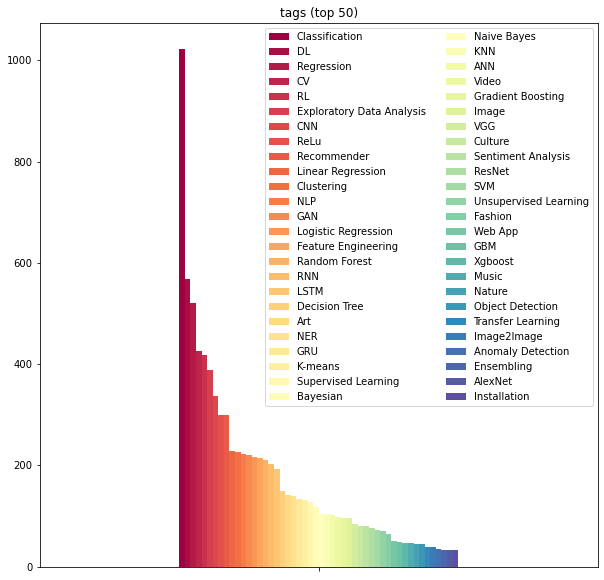

In [27]:
tags = []
for item in df['tags']:
    tags.extend(item)
    
df2 = pd.DataFrame(tags)
truncate = 50
chart_feature(0, stacked=False, sort_index=False, df=df2, columns=2, truncate=truncate, label='tags (top '+str(truncate)+')')

add_guide('tags', df2[0], drop=['None'], sort=True, show=True)

['CSS', 'Emacs Lisp', 'Go', 'HTML', 'Java', 'JavaScript', 'Jsonnet', 'Jupyter Notebook', 'Lasso', 'MATLAB', 'OpenEdge ABL', 'Python', 'R', 'R notebook', 'Scala', 'Shell', 'TeX', 'TypeScript']


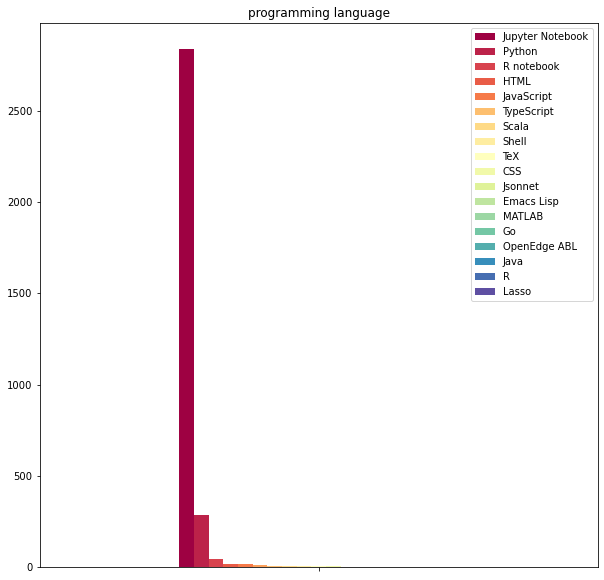

In [28]:
#rename = {'Python notebook': 'Jupyter Notebook'}
#df2 = pd.DataFrame(df['language'])
#df2["language"].replace(rename, inplace=True)

chart_feature('programming_language', stacked=False, label='programming language')

add_guide('language', df['programming_language'], drop=[''], sort=True, show=True)

['AGPL-3.0', 'Apache-2.0', 'BSD-2-Clause', 'BSD-3-Clause', 'CC-BY-4.0', 'CC-BY-SA-4.0', 'CC0-1.0', 'GPL-2.0', 'GPL-3.0', 'ISC', 'LGPL-3.0', 'MIT']


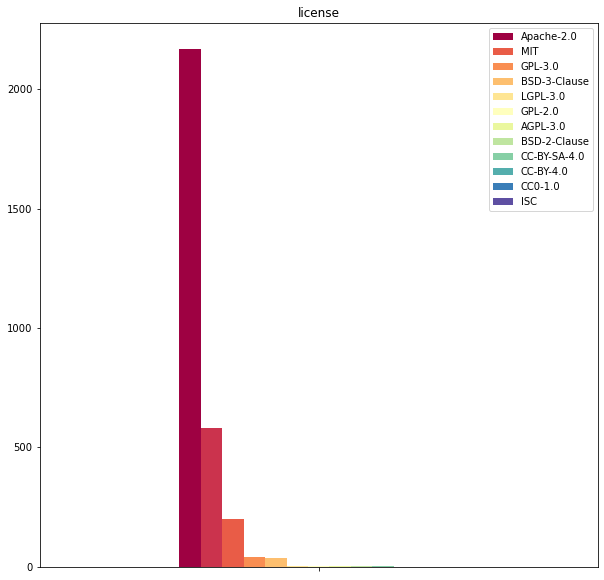

In [29]:
#rename = {'Apache 2.0': 'Apache-2.0', 'Learn more about GitHub Sponsors':None, 'Unlicense':None}
#df2 = pd.DataFrame(df['license'])
#df2["license"].replace(rename, inplace=True)

chart_feature('license', df=df, truncate_start=0, stacked=False)

add_guide('license', df['license'], drop=['','Unlicense','Learn more about GitHub Sponsors'], sort=True, show=True)

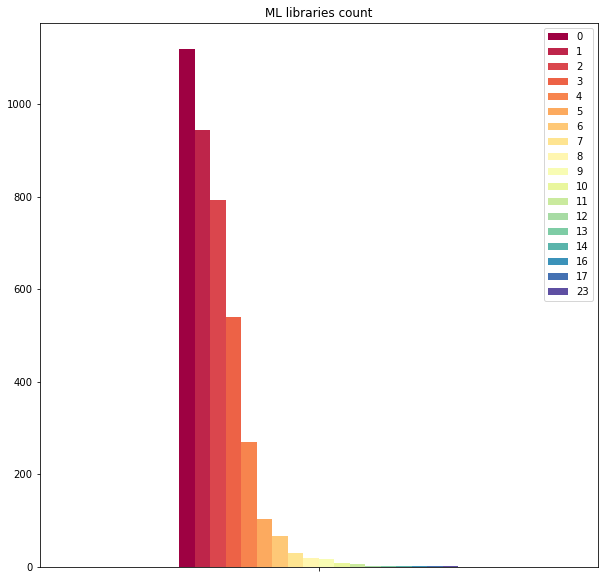

In [30]:
df['ml_libs_count'] = [len(x) if isinstance(x, list) else 0 for x in df['ml_libs']]
chart_feature('ml_libs_count', stacked=False, sort_index=True, label='ML libraries count')

['Pillow', 'SimpleCV', 'SimpleITK', 'albumentations', 'autokeras', 'autosklearn', 'caffe', 'catboost', 'chainerrl', 'detectron', 'face_recognition', 'gensim', 'h2o', 'imutils', 'keras', 'lightgbm', 'mlbox', 'mxnet', 'nltk', 'opencv-python', 'openface', 'pattern', 'py-faster-rcnn', 'pylearn2', 'pytorch', 'pytorchcv', 'rl_coach', 'skimage', 'sklearn', 'spacy', 'stanza', 'statsmodels', 'tensorflow', 'textblob', 'theano', 'tpot', 'vocabulary', 'xgboost']


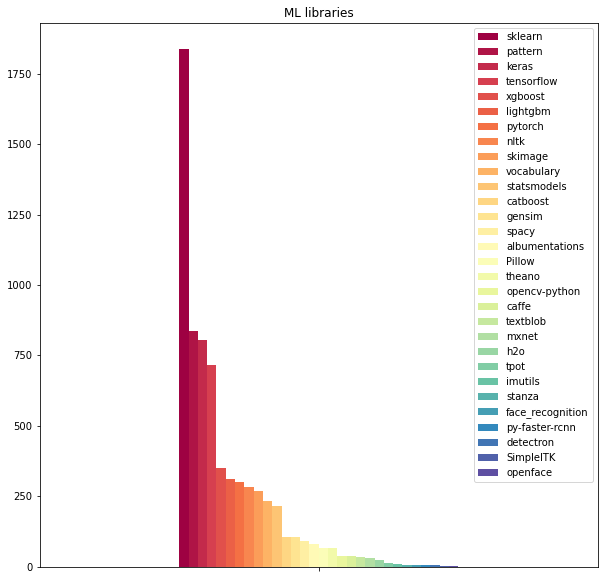

In [31]:
ml_libs = []
for item in df['ml_libs']:
    if isinstance(item, list):
        ml_libs.extend(item)
    
df2 = pd.DataFrame(ml_libs)
chart_feature(0, stacked=False, sort_index=False, df=df2, truncate=30, label='ML libraries')

add_guide('ml_libs', df2[0], drop=[], sort=True, show=True)

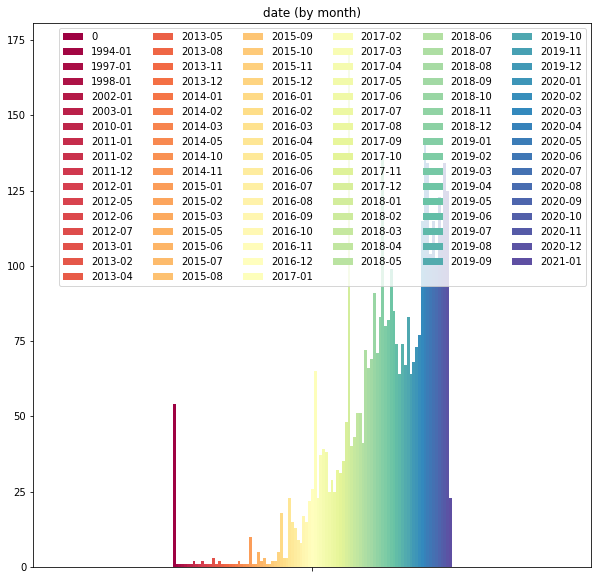

In [32]:
df['date_round'] = ['-'.join((x.split('-'))[0:2]) if isinstance(x, str) else '0' for x in df['date_project']]
chart_feature('date_round', stacked=False, sort_index=True, label='date (by month)', legend=1, columns=6)

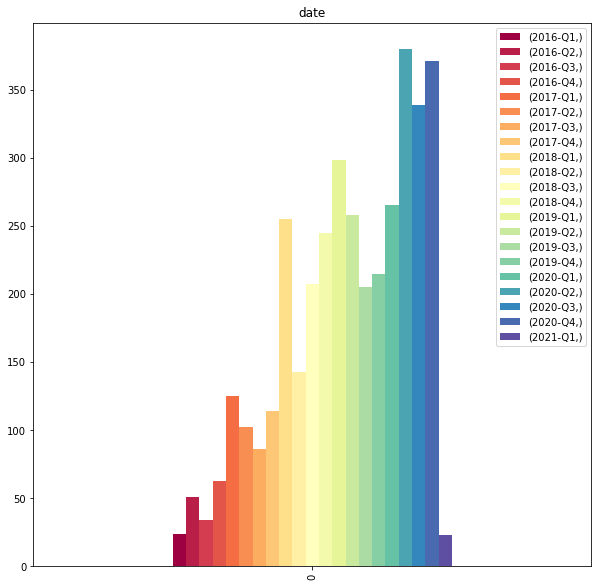

In [33]:
import math

# diagram activity
def chart_activity(feature, truncate=0, truncate_start=0, label=None):
    data = []

    for item in df[feature]:
        if isinstance(item, str) and item!='':
            parts = item.split('-')
            #print(parts)
            if len(parts) == 3:
                quarter = math.ceil(int(parts[1]) / 3)
                data.append(parts[0]+'-Q'+str(quarter))
    
    df2 = pd.DataFrame(data)
    
    n = df2.value_counts(sort = False)
    n = pd.Series(n.index.values, index=n)
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n)
    
    if truncate!=0:
        n = n[0:truncate]
        
    if truncate_start!=0:
        n = n[truncate_start:]
        
    if label == None:
        label = feature
    
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=label, colormap='Spectral')
    fig = ax.get_figure()
    #fig.savefig(feature + '.png')
    
#print(df.head)
chart_activity('date_project', truncate_start=22, label='date')

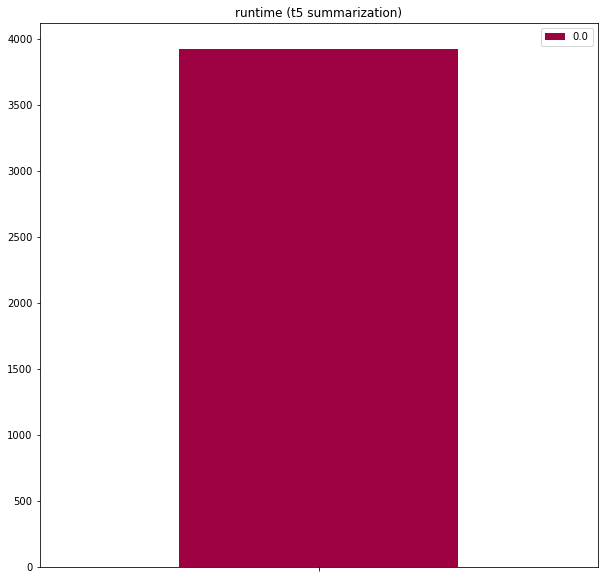

In [34]:
steps = 1
df['runtime_round'] = [round(x/steps,0)*steps if isinstance(x, float) and x != None else 0.0 for x in df['runtime']]
chart_feature('runtime_round', stacked=False, sort_index=True, truncate_start=0, label='runtime (t5 summarization)')

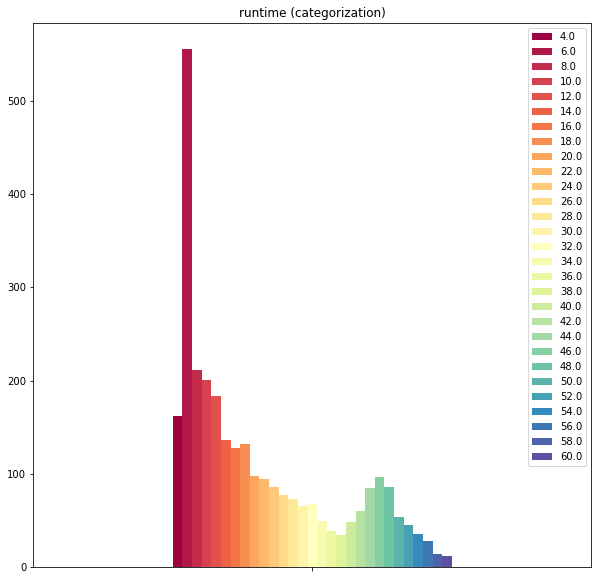

In [35]:
steps = 2
# df['runtime_round'] = [round(x+y/steps,0)*steps for x in df['runtime'] for y in df['runtime_cat']]
df['runtime_cat_round'] = [round(x/steps,0)*steps for x in df['runtime_cat']]
chart_feature('runtime_cat_round', stacked=False, sort_index=True, truncate=60, label='runtime (categorization)')

In [36]:
# store guide
print(list(form_guide.keys()))

path = '../elasticsearch/templates/guide.json'

store_data(form_guide, path, toJson=True)

['category', 'subcategory', 'host', 'kind', 'tags', 'language', 'license', 'ml_libs']


7807